Starting point for clustering. 

Our data will undergo cluster analysis to group similar states. First we must pre-process the dataset to aggregate the values.

We will also compute the education budget allocated per person and the portion of the state's population relying on snaps.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# load the csv file into a data frame
df = pd.read_csv('./data/data.csv')

# group the data by state and calculate the median for each column
df = df.groupby('State').median()
df = df.drop('Year', axis=1) # drop year since we're using median for simplicity

# Reset the index of the resulting data frame to include the state names as a column
df = df.reset_index()

# define a lambda function that computes the new value
compute_education_cost_per_person = lambda row: row['Education Budget'] / row['Population Estimate']
compute_snaps_rate = lambda row: row['SNAPS individual_participants'] / row['Population Estimate']

# apply the lambda function to each row and assign the result to a new column
df['Education Cost Per Person'] = df.apply(compute_education_cost_per_person, axis=1)
df['SNAPs Reliance Rate'] = df.apply(compute_snaps_rate, axis=1)

# print preview of the resulting data frame
df_exclude_dc = df[df['State'] != "District of Columbia"]
df_exclude_dc.head(-30)

,State,Education Budget,Unemployment Rate,Population Estimate,SNAPS household_participants,SNAPS individual_participants,SNAPS cost,SNAPS cost_per_person,SNAPS cost_per_household,Median Income,U.S. Rank,% Change,Job Growth (In Thousands),# of Jobs (In Thousands),GDP,Education Cost Per Person,SNAPs Reliance Rate
0,Alabama,2.729781e+09,5.8,4757938.0,3.155510e+05,6.791384e+05,1.032065e+09,121.7689,224.5335,42278.0,32.0,0.85,16.2,1930.0,1.876100e+11,573.732015,0.142738
1,Alaska,3.694109e+08,6.8,698895.0,3.044092e+04,7.644517e+04,1.594140e+08,167.7730,331.3084,79700.0,27.0,1.02,3.3,309.4,5.343000e+10,528.564180,0.109380
2,Arizona,5.143402e+09,5.5,6343154.0,3.451060e+05,8.139871e+05,1.210430e+09,123.6184,236.9047,61290.0,11.0,2.24,52.2,2518.0,2.734800e+11,810.858841,0.128325
3,Arkansas,1.334963e+09,5.4,2896843.0,1.647613e+05,3.848886e+05,4.804727e+08,115.5262,216.7004,49918.0,26.0,0.80,9.6,1177.3,1.079300e+11,460.833798,0.132865
4,California,1.576850e+10,6.2,36961229.0,1.391359e+06,3.238548e+06,5.691852e+09,141.9944,245.5065,71977.0,16.0,1.97,285.3,14999.2,2.061640e+12,426.622806,0.087620
5,Colorado,2.724959e+09,5.0,4972195.0,1.762892e+05,4.046785e+05,6.390005e+08,131.2611,242.1168,75776.0,10.0,2.38,54.0,2281.2,2.709800e+11,548.039441,0.081388
6,Connecticut,1.579568e+09,5.1,3561807.0,1.804629e+05,3.360644e+05,5.696844e+08,134.6549,173.0353,81166.0,42.0,0.42,6.8,1655.5,2.409100e+11,443.473712,0.094352
7,Delaware,3.751823e+08,4.5,891730.0,5.050700e+04,1.125131e+05,1.711553e+08,122.2289,208.0679,69087.0,24.0,1.22,5.4,420.3,6.048000e+10,420.735318,0.126174
9,Florida,8.753067e+09,5.1,18652644.0,1.370563e+06,2.603185e+06,4.035386e+09,129.3333,185.7992,57549.0,8.0,2.28,169.6,7577.0,7.948400e+11,469.266804,0.139561
10,Georgia,5.039338e+09,5.3,9620846.0,6.147500e+05,1.332536e+06,2.115101e+09,125.9539,232.3960,60012.0,18.0,1.83,71.6,3992.9,4.477600e+11,523.793623,0.138505


We must first determine the optimal number of clusters

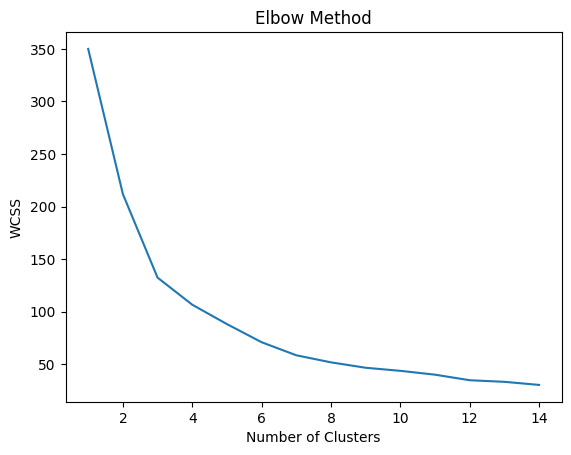

In [40]:
# extract features

features = df_exclude_dc[["Education Budget", "SNAPS cost", "Unemployment Rate", "Population Estimate", 
                          "Median Income", "GDP", "SNAPs Reliance Rate"]]
features_array = features.values

# standardize the features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# determine the optimal number of clusters
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The 'elbow' forms at 3 so we will use k=3 clusters

/var/folders/_4/c35ggx0x1hx0llprwqbf_7xm0000gn/T/ipykernel_95882/642094814.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclude_dc["cluster"] = labels


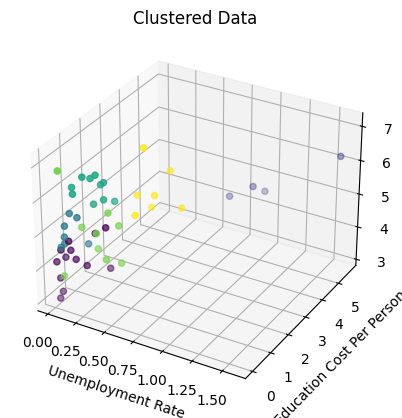

States in cluster 0:
['Delaware', 'Hawaii', 'Indiana', 'Iowa', 'Kansas', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota', 'Utah', 'Vermont', 'Wisconsin', 'Wyoming']


States in cluster 1:
['California', 'Florida', 'New York', 'Texas']


States in cluster 2:
['Arkansas', 'Idaho', 'Maine', 'Montana', 'Nevada', 'Oklahoma', 'Rhode Island']


States in cluster 3:
['Alabama', 'Kentucky', 'Louisiana', 'Mississippi', 'New Mexico', 'Oregon', 'South Carolina', 'Tennessee', 'Washington', 'West Virginia']


States in cluster 4:
['Alaska', 'Colorado', 'Connecticut', 'Maryland', 'Massachusetts', 'Minnesota', 'New Hampshire', 'New Jersey', 'Virginia']


States in cluster 5:
['Arizona', 'Georgia', 'Illinois', 'Michigan', 'North Carolina', 'Ohio', 'Pennsylvania']


[['Delaware', 'Hawaii', 'Indiana', 'Iowa', 'Kansas', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota', 'Utah', 'Vermont', 'Wisconsin', 'Wyoming'], ['California', 'Florida', 'New York', 'Texas'], ['Arkansas', 'Idaho', 'Maine', 'M

In [43]:
# specify number of clusters
k = 6

# initialize k-means clustering algorithm
kmeans = KMeans(n_clusters=k, n_init='auto')

# fit the algorithm to the data
kmeans.fit(features_std)

# get the cluster labels for each data point
labels = kmeans.predict(features_std)

# add cluster labels to the data
df_exclude_dc["cluster"] = labels

# create 3D scatter plot of the data points with different colors for each cluster
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(features.iloc[:, 0], features.iloc[:, 1], features.iloc[:, 2], c=labels, cmap="viridis")

# add axis labels and a title
ax.set_xlabel("Unemployment Rate")
ax.set_ylabel("Education Cost Per Person")
ax.set_zlabel("SNAP Reliance Rate")
ax.set_title("Clustered Data")

# show the plot
plt.show()

# print out the states in each cluster
clusters = [] # store clusters in 2d array
for i in range(k):
    print(f"States in cluster {i}:")
    print(df_exclude_dc[df_exclude_dc['cluster'] == i]['State'].tolist())
    print("\n")
    clusters.append(df_exclude_dc[df_exclude_dc['cluster'] == i]['State'].tolist())

print(clusters)

In [4]:
# save array for future use
import json

cluster_dict = dict()
for cluster_count in range(len(clusters)):
    cluster_dict[cluster_count] = clusters[cluster_count]

with open('data/clustered_states.json', 'w') as fp:
    json.dump(cluster_dict, fp)
